# YouTube data exploration

## 1. Research questions and project objectives 

YouTube in the most popular video sharing platform in the world nowadays.By looking into the trending videos of YouTube, we could have an overview of the hot topics of videos of a certain time period, audience's interactions and even sentiment of these vieos.It's a good window into the objective world and the subjective responses of people.

In this research, trending vieos of Great Britain would be used to get insights into YouTube trending videos,to see what is common and what is different between these videos.These includes the common features of the YouTube trending videos 
and the difference of different categories.The insights from that could be helpful for people who want to increase the popularity of their videos on YouTube.

Therefore, the project objectives can be broken down into the following points:\
1 How likes, dislikes, views, comment counts of the trending videos are related to each other? \
2 In which time periods do most trending videos appear?\
3 Distribution of likes, dislikes, views, comment counts by different categories.\
4 Which video category (e.g. entertainment, gaming, comedy, etc.) has the largest number of trending videos?\
5 Which video category has the biggest like/dislike ratio and view/comment ratio? \
6 What are the most common words in different video categories? 

## 2. Data collection 
The data of this research comes from Kaggle which includes trending videos from US, Cananda, Great Britain, France, Germany, Russia, Mexico, South Korea, Japan and India. Here, data of Great Britain is focused which covers 205 days of 2017 and 2018 and has nearly 40000. The dataset can be found here: https://www.kaggle.com/datasnaek/youtube-new

## 3. Getting a feeling of the data 


### 3.1 Import libararys and data

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output

In [21]:
df= pd.read_csv("D:/program in glasgow/PTUA/assignment/youtube-new/GBvideos.csv")


### 3.2 Basic information of data

In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
video_id                  38916 non-null object
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38304 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.0+ MB


In [5]:
df.nunique()

video_id                   3272
trending_date               205
title                      3369
channel_title              1625
category_id                  16
publish_time               3250
tags                       3122
views                     38393
likes                     30556
dislikes                  11092
comment_count             15778
thumbnail_link             3272
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                3704
dtype: int64

In [6]:
df.category_id.unique()

array([26, 24, 10, 17, 25, 22, 23, 28, 15, 27,  1, 20,  2, 19, 29, 43],
      dtype=int64)

In [39]:
df.trending_date.value_counts()

2017-12-31    200
2017-12-07    200
2018-03-04    200
2017-12-13    200
2018-01-27    200
             ... 
2018-05-24    155
2018-05-21    154
2018-05-23    153
2018-05-22    152
2018-05-15    148
Name: trending_date, Length: 205, dtype: int64

The dataset shows information about trending videos' titles, tags, channels, the number of likes, dislikes, views, comment counts and so on. Specificly, there are 16 categories of YouTube trending videos and these videos covers 205 days of 2017 and 2018.

## 4. Data cleaning

As there are some rows whose description values are null, each null value is replaced with an empty string in the description column.

In [22]:
# missing values
df["description"] = df["description"].fillna(value = " ")

## 5. Feature engineering  

To specify what each category_id means, a new column "category_name" is created.There are 16 categories of the trending videos.They are Howto & Style, Entertainment, Music, Sports, News & Politics, People & Blogs, Comedy, Science & Technology, Pets & Animals, Education, Film & Animation, Gaming, Autos & Vehicles, Travel & Events, Non Profits & Activism, and Shows respectively.

In [23]:
# Create a new column, identify the category name of category_id
df['category_name'] = np.nan
df.loc[(df["category_id"] == 1, "category_name")] = 'Film & Animation'
df.loc[(df["category_id"] == 2, "category_name")]= 'Autos & Vehicles'
df.loc[(df["category_id"] == 10, "category_name")] = 'Music'
df.loc[(df["category_id"] == 15, "category_name")] = 'Pets & Animals'
df.loc[(df["category_id"] == 17, "category_name")] = 'Sports'
df.loc[(df["category_id"] == 19, "category_name")] = 'Travel & Events'
df.loc[(df["category_id"] == 20, "category_name")] = 'Gaming'
df.loc[(df["category_id"] == 22, "category_name")] = 'People & Blogs'
df.loc[(df["category_id"] == 23, "category_name")] = 'Comedy'
df.loc[(df["category_id"] == 24, "category_name")] = 'Entertainment'
df.loc[(df["category_id"] == 25, "category_name")] = 'News & Politics'
df.loc[(df["category_id"] == 26, "category_name")] = 'Howto & Style'
df.loc[(df["category_id"] == 27, "category_name")] = 'Education'
df.loc[(df["category_id"] == 28, "category_name")] = 'Science & Technology'
df.loc[(df["category_id"] == 29, "category_name")] = 'Non Profits & Activism'
df.loc[(df["category_id"] == 43, "category_name")] = 'Shows'
category_list = df['category_name'].unique()
category_list

array(['Howto & Style', 'Entertainment', 'Music', 'Sports',
       'News & Politics', 'People & Blogs', 'Comedy',
       'Science & Technology', 'Pets & Animals', 'Education',
       'Film & Animation', 'Gaming', 'Autos & Vehicles',
       'Travel & Events', 'Non Profits & Activism', 'Shows'], dtype=object)

To easily perform arithmetic operations, two columns, "trending_date" and "publish_time", are transformed from string to datetime format.To see whether there are some interesting findings in respect of publish time of these trending videos,"publish_time" is again divided into two columns"publish_time" and "publish_hour".

In [24]:
# reformat the daytime 
df['trending_date'] = pd.to_datetime(df['trending_date'], format = '%y.%d.%m').dt.date
publish_time = pd.to_datetime(df['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_date'] = publish_time.dt.date
df['publish_time'] = publish_time.dt.time
df['publish_hour'] = publish_time.dt.hour
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_date,publish_hour
0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,07:38:29,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,2017-11-10,7
1,3s1rvMFUweQ,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,06:24:44,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Entertainment,2017-11-12,6
2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,2017-11-10,17
3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,02:30:38,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports,2017-11-13,2
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,01:45:13,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics,2017-11-13,1


## 6. Data analysis 

### 6.1 Distribution of likes, dislikes, views and comment counts

Let's first take a look at the distribution of audience's interaction.

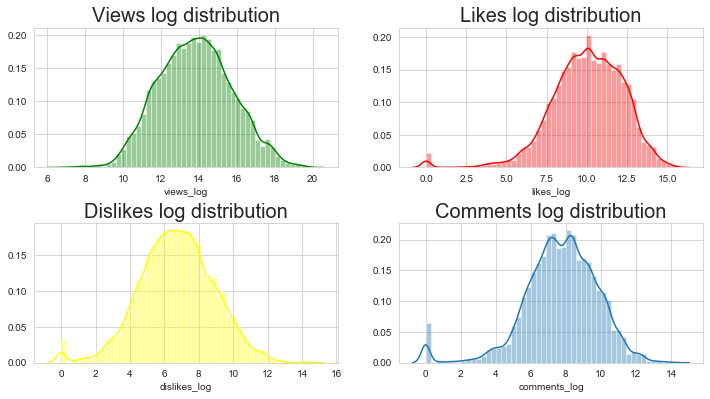

In [45]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comments_log'] = np.log(df['comment_count'] + 1)

plt.figure(figsize = (12,6))
           
plt.subplot(221)
g1 =sns.distplot(df['views_log'], color = 'green')
g1.set_title("Views log distribution", fontsize = 20)
           
plt.subplot(222)
g2 = sns.distplot(df['likes_log'], color = 'r')
g2.set_title("Likes log distribution", fontsize = 20)
           
plt.subplot(223)
g3 = sns.distplot(df['dislikes_log'], color = 'yellow')
g3.set_title("Dislikes log distribution", fontsize = 20)
           
plt.subplot(224)
g4 = sns.distplot(df['comments_log'])
g4.set_title("Comments log distribution", fontsize = 20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)
plt.show()

Basicly, all the number of four audience's interaction are normally distributed, although the distribution of "comments_log" seems to lack a "peak". We can also find that there are three small peaks in "0" in distribution exept "views_log", which is reasonable. There are cases that no likes, dislikes or comments are left in some trending videos. What's more, the distribution of "views_log", "likes_log", "comments_log" and "dislikes_log" are approximately symmetric with 14, 10, 8, 7 as the center respectively. That means the number of "views", "likes", "comments" and "dislikes" are decreasing roughly in order.

### 6.2  How  are trending videos' views, likes, dislikes, comment counts  related to each other? 

This analysis is aimed at finding out the potential pattern of audience's different interactions. Majority of us would assume that more views are usually accompanied with more likes, more dislikes and more comments, but how about other relationships?

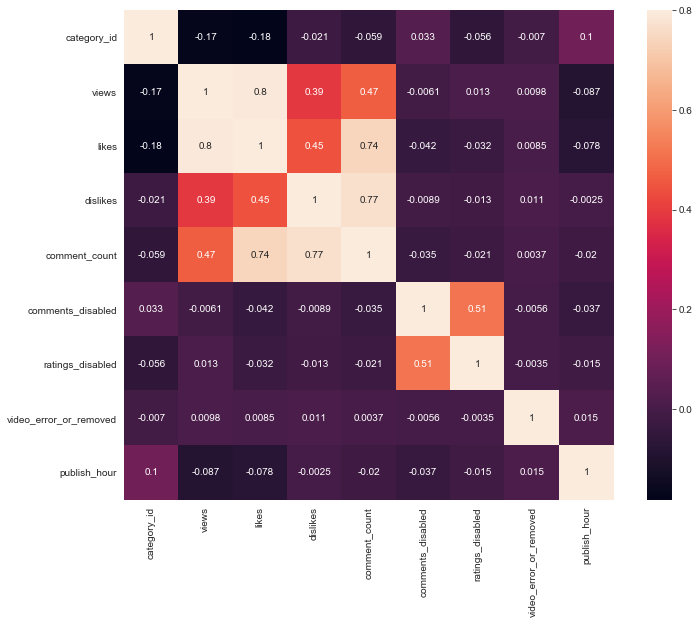

In [25]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot = True, vmax=.8, square=True);

As can be seen from the heatmap, the previous assumption is confirmed, that is the number of views are positively correlated with the number of likes, dislikes and comments. But the correlation coefficient of views and likes (0.8) is bigger than that of the other two pairs (0.39 and 0.47 respectively), which means the positive correlation of views and likes is higher than the other. Meanwhile, the number of likes and comments, dislikes and comments show relatively high positive correlation. It is interesting to note that the number of likes and dislikes is also positively correlated, although the correlation coefficient is not that high. That may be explained as: the videos with more likes are more extreme to some extent and therefore meet with more dislikes.

###  6.3 Which publish time period have more trending videos?

As the probability of people watching the YouTube videos is different at different times of the day in daily life, choosing a suitable time to publish videos in the platform is crucial in order to increase the chance of being watched and even the popularity of videos. Therefore, publish hour of the trending videos is analysed to find patterns.

In [26]:
time_df = df['publish_hour'].value_counts().reset_index()
time_df.columns = ['publish_hour', 'count']
time_df

,publish_hour,count
0,17,3410
1,16,3231
2,15,3014
3,14,2372
4,18,2281
5,5,2147
6,19,2052
7,13,1968
8,4,1808
9,21,1699


Text(0.5, 1.0, 'Publish hour of trending videos in Great Britain')

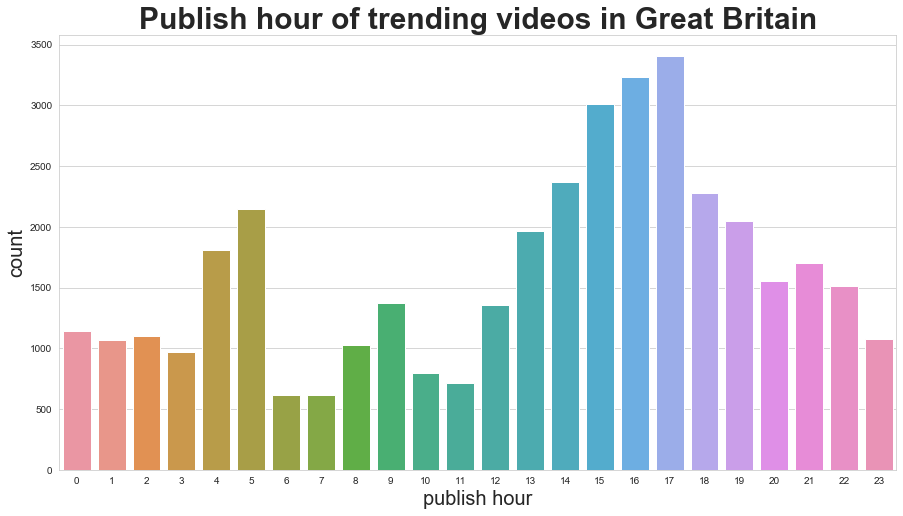

In [27]:
plt.figure(figsize = (15,8))
sns.set_style("whitegrid")
sns.barplot(y = time_df['count'], x = time_df['publish_hour'], data = time_df )
plt.xlabel("publish hour", fontsize = 20)
plt.ylabel("count", fontsize = 20)
plt.title("Publish hour of trending videos in Great Britain", fontsize = 30, fontweight = 'bold')

The figure shows two peaks distributed during 4：00-5：00am and 14:00-18:00pm. Most of the trending videos are distributed mainly in the afternoon and the largest number of trending videos appear at 17:00pm. The peak in the afternnon can be easy to explain as generally speaking people are getting tired in the afternoon no matter in their jobs or studies and need something to get rid of the fatigue. Similarly, time period in the evening shows more trending videos as most people are free and more likely to watch videos to kill time at this time interval.In the morning, 9:00am has more trending videos than other times, maybe that is because this time is the only short idle time between getting up and getting down to business. However, it is a little strange and hard to explain the small peak during 4:00-5:00am.

### 6.4 Which video category has the largest number of trending videos? 

Compared with having a big picture about the trending videos, the difference of different categories is more of my interest. The differences include which category has the most trending vides, which category is the most loved or most commented, what are the most common words of comments and so on. By doing so, we will have a more detailed and deeper insight about the trending videos.

In [30]:
number_df = df["category_name"].value_counts().reset_index()
number_df.columns = ['category_name', 'count']
number_df

,category_name,count
0,Music,13754
1,Entertainment,9124
2,People & Blogs,2926
3,Film & Animation,2577
4,Howto & Style,1928
5,Sports,1907
6,Comedy,1828
7,Gaming,1788
8,News & Politics,1225
9,Pets & Animals,534


Text(0.5, 1.0, 'Categeries of trending videos in Great Britain')

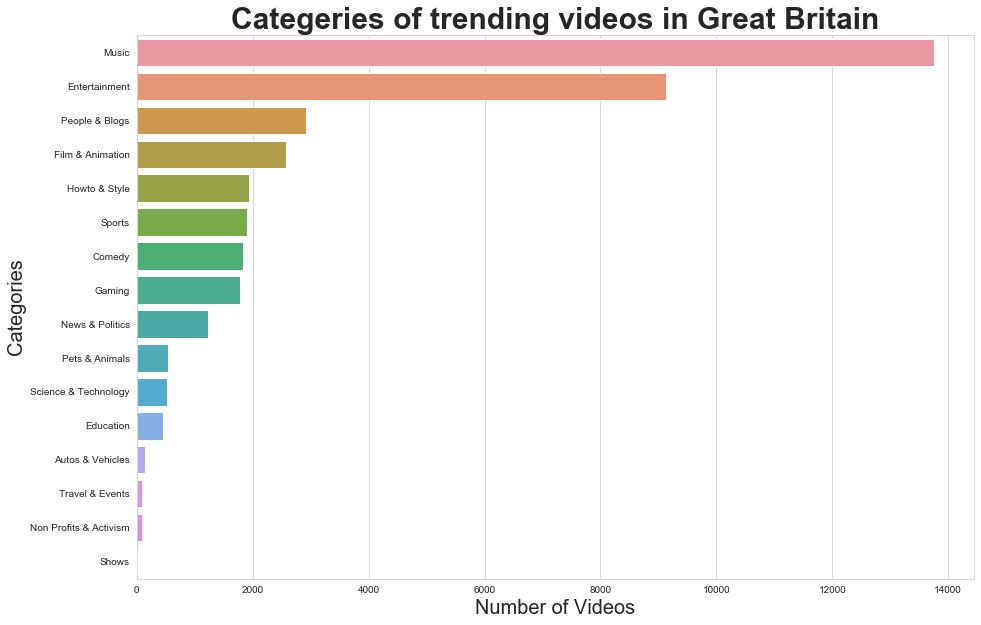

In [31]:
plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
sns.barplot(y = number_df['category_name'], x = number_df['count'], data = number_df, orient = 'h' )
plt.xlabel("Number of Videos", fontsize = 20)
plt.ylabel("Categories", fontsize = 20)
plt.title("Categeries of trending videos in Great Britain", fontsize = 30, fontweight = 'bold')

As can be shown in the barchart, Music and Entertainment videos have dominating  number of trending videos compared with other categories. Music videos have the largest number of trending videos followed by Entertainment, People & Blogs and Films & Animation.

### 6.5 The distribution of likes, dislikes, view and comment counts by different categories

To have a deeper understanding about the likes, dislikes, views and comment counts of different categories,  the horizontal comparison between different categories are made as follows.

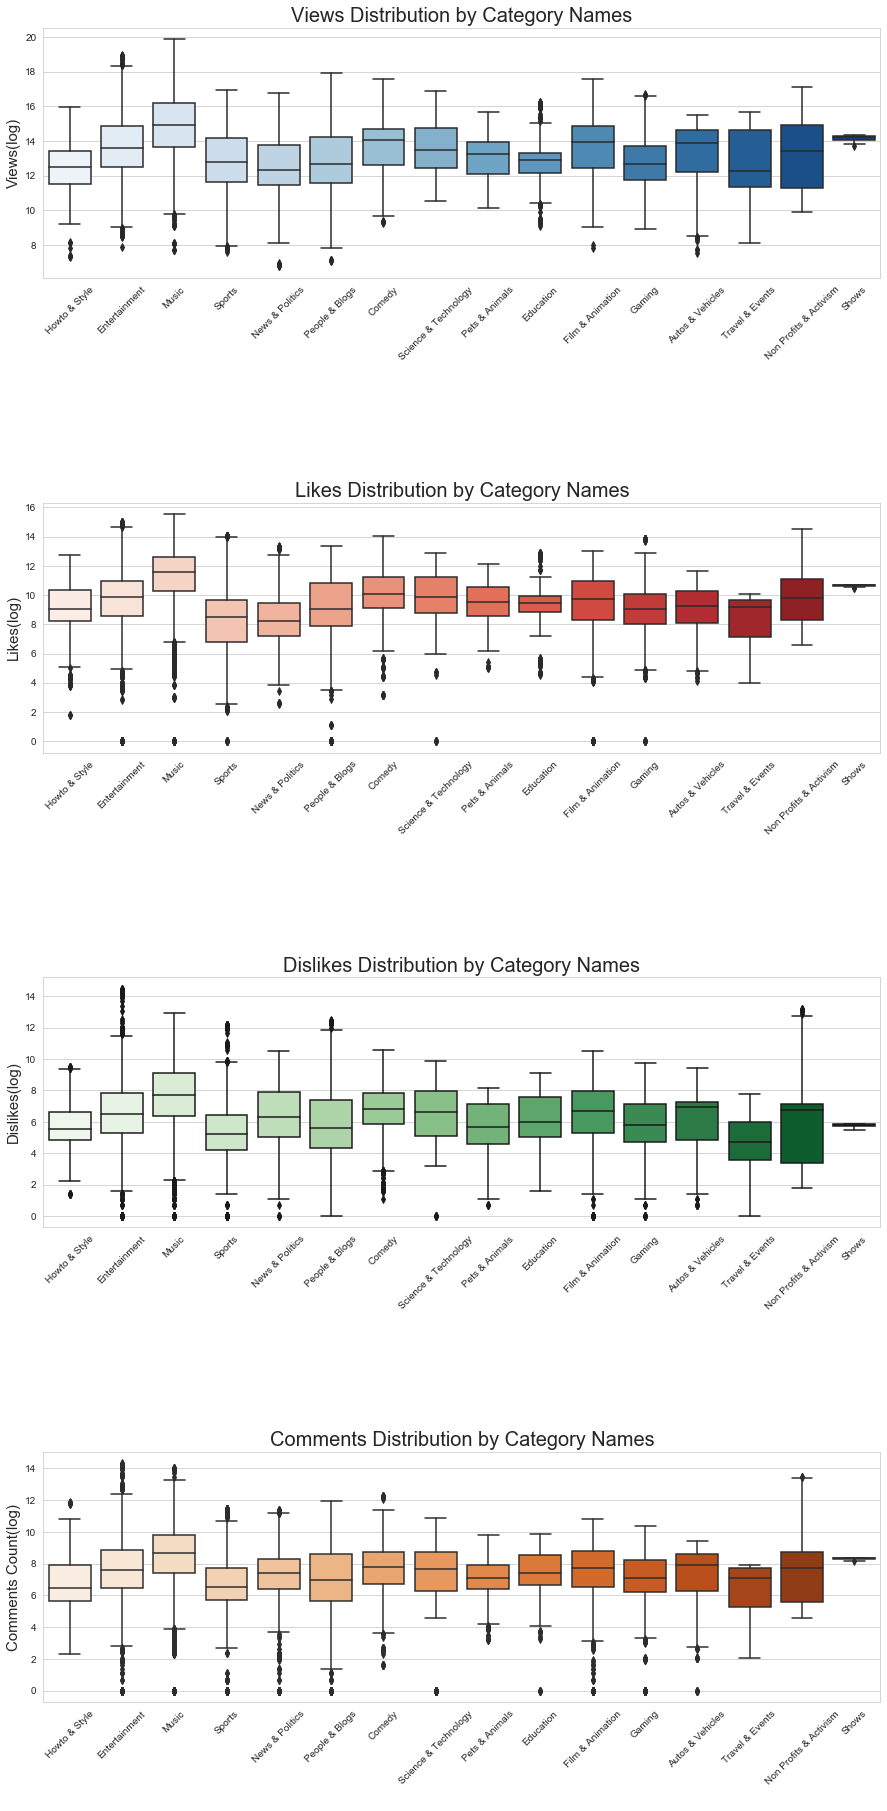

In [43]:
plt.figure(figsize = (15,30))

plt.subplot(411)
g1 = sns.boxplot(x = 'category_name', y = "views_log", data = df, palette = "Blues")
g1.set_xticklabels(g1.get_xticklabels(), rotation = 45)
g1.set_title("Views Distribution by Category Names", fontsize = 20)
g1.set_xlabel(" ",fontsize = 15)
g1.set_ylabel("Views(log)", fontsize = 15)

plt.subplot(412)
g2 = sns.boxplot(x = 'category_name', y = "likes_log", data = df, palette = "Reds")
g2.set_xticklabels(g2.get_xticklabels(), rotation = 45)
g2.set_title("Likes Distribution by Category Names", fontsize = 20)
g2.set_xlabel(" ",fontsize = 15)
g2.set_ylabel("Likes(log)", fontsize = 15)

plt.subplot(413)
g3 = sns.boxplot(x = 'category_name', y = "dislikes_log", data = df, palette = "Greens")
g3.set_xticklabels(g3.get_xticklabels(), rotation = 45)
g3.set_title("Dislikes Distribution by Category Names", fontsize = 20)
g3.set_xlabel(" ",fontsize = 15)
g3.set_ylabel("Dislikes(log)", fontsize = 15)

plt.subplot(414)
g4 = sns.boxplot(x = 'category_name', y = "comments_log", data = df, palette = "Oranges")
g4.set_xticklabels(g4.get_xticklabels(), rotation = 45)
g4.set_title("Comments Distribution by Category Names", fontsize = 20)
g4.set_xlabel(" ",fontsize = 15)
g4.set_ylabel("Comments Count(log)", fontsize = 15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.show()

There are many interesting findings in terms of the four audience's interation. With respect to the nubmber of "views", there are more views in "Music", "Entertainment" and "Film & Animation" category, less views in "Education" and "Gaming" catergory and half of "Non Profits & Activism" category has a relatively high number of views. 
As for the number of "likes", "Music", "Entertainment", "Comedy", "Science & Technology", "Pets & Animals" and "Film & Animation" category shows more "likes". 
While for "dislikes", "Music" category still shows more number of "dislikes". And it is worth noting that the medians are very close to the upper quartiles in  "Autos & Events" and "Non Profits & Activisim" category. That means in the videos marked as "dislike", there are half of the "dislikes" has much more numbers than the other half.
For "comments", "Music" category still has more comments and the other categories show almost the same number of comments. In "Autos & Events", "Travel & Events" and "Non Profits & Activisim" categories, half of the videos have much more comments than the other half videos.

### 6.6 Ratio of Likes-Dislikes and Comments-Views in different categories

To better show audience's pereference and comment ratio, two variables are created,"Likes-Dislikes ratio" and "Views-Comments ratio". "Likes-Dislikes ratio" could help to represent the videos' popularity degree, the higher value, the higher popularity degree. And "Comments_Views_ratio" could help tp represent the degree of comment, the higher value, the higher degree of comment.

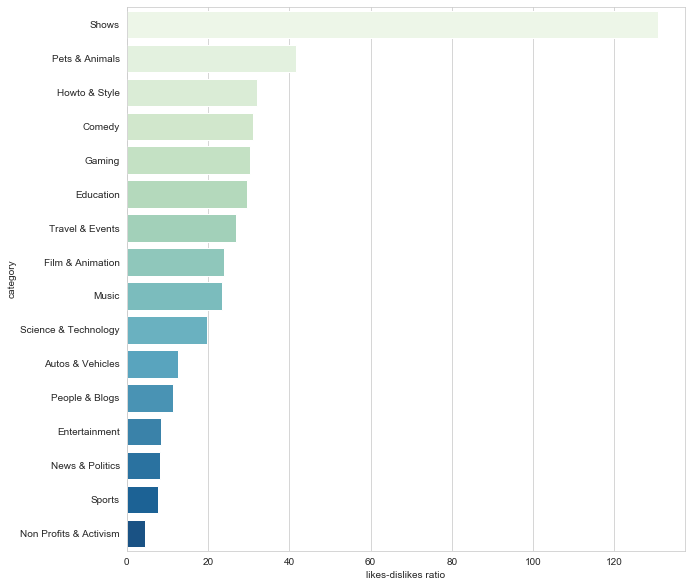

In [23]:
like_dislike_ratio = df.groupby('category_name')['likes'].agg('sum')/df.groupby('category_name')['dislikes'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending = False).reset_index()
like_dislike_ratio.columns = ['category', 'likes-dislikes ratio']
plt.subplots(figsize= (10,10))
sns.barplot(x = "likes-dislikes ratio", y = "category", data = like_dislike_ratio, palette = "GnBu_r" )

It is shown that category "Shows" have highest likes-dislikes ratio among the 16 categories. In other words, in the 20 trending videos of this category, "likes" are much more dominant than "dislikes". However, this does not necessarily mean that all the "shows" videos enjoy the highest popularity degree than other categories. Besides, "Pets & Animals" videos have high likes-dislikes ratio. Not suprisingly, it is hard for people to hate pets and animals. "Non Profits & Activism" videos have lowest likes-dislikes ratio, so people relatively hate this kind of videos.

In [46]:
df.category_name.value_counts()

Music                     13754
Entertainment              9124
People & Blogs             2926
Film & Animation           2577
Howto & Style              1928
Sports                     1907
Comedy                     1828
Gaming                     1788
News & Politics            1225
Pets & Animals              534
Science & Technology        518
Education                   457
Autos & Vehicles            144
Travel & Events              96
Non Profits & Activism       90
Shows                        20
Name: category_name, dtype: int64

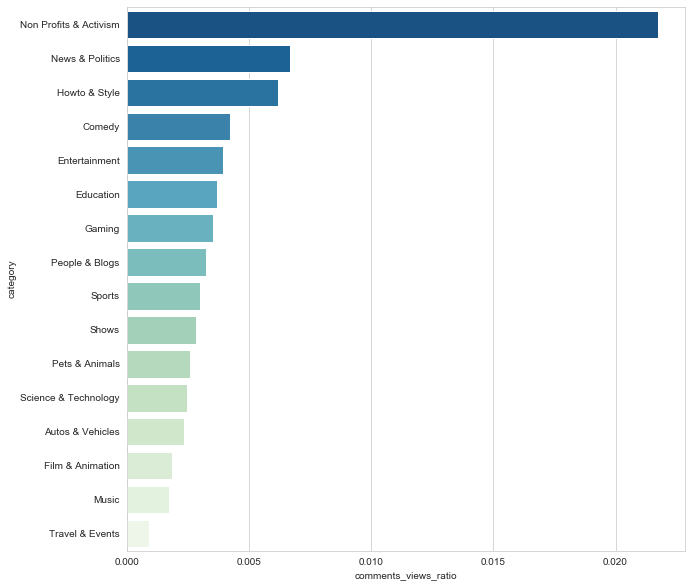

In [49]:
comments_views_ratio = df.groupby('category_name')['comment_count'].agg('sum')/df.groupby('category_name')['views'].agg('sum')
comments_views_ratio = comments_views_ratio.sort_values(ascending = False).reset_index()
comments_views_ratio.columns = ['category', 'comments_views_ratio']
plt.subplots(figsize= (10,10))
sns.barplot(x = "comments_views_ratio", y = "category", data = comments_views_ratio, palette = "GnBu_r")

As for degree of comment, "Non Profits & Activism" videos have the highest comments_views_ratio, therefore, people are more likely to comment on this kind of category. While, "Travel & Events" videos shows the lowest comments_views_ratio.
Obviously, people still prefer implicit feedback than explicit. The comments_views_ratio of "Non Profits & Activism" videos is only slightly higher than 0.020.

### 6.7 Most common word in different video category? 

In this part of analysis, most common words are explored in different categories to see the most popular topics within the different categories.

In [26]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nwz001798\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nwz001798\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
def wcloud(data, bgcolor):
    plt.figure(figsize = (20,15))
    cloud = WordCloud(background_color = bgcolor, max_words = 100, max_font_size =50)
    cloud.generate(' '.join(data))
    plt.imshow(cloud)
    plt.axis('off')

In [28]:
en_stopwords = list(stopwords.words('english'))
ge_stopwords = list(stopwords.words('german'))
fr_stopwords = list(stopwords.words('french'))
en_stopwords.extend(ge_stopwords)
en_stopwords.extend(fr_stopwords)
en_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

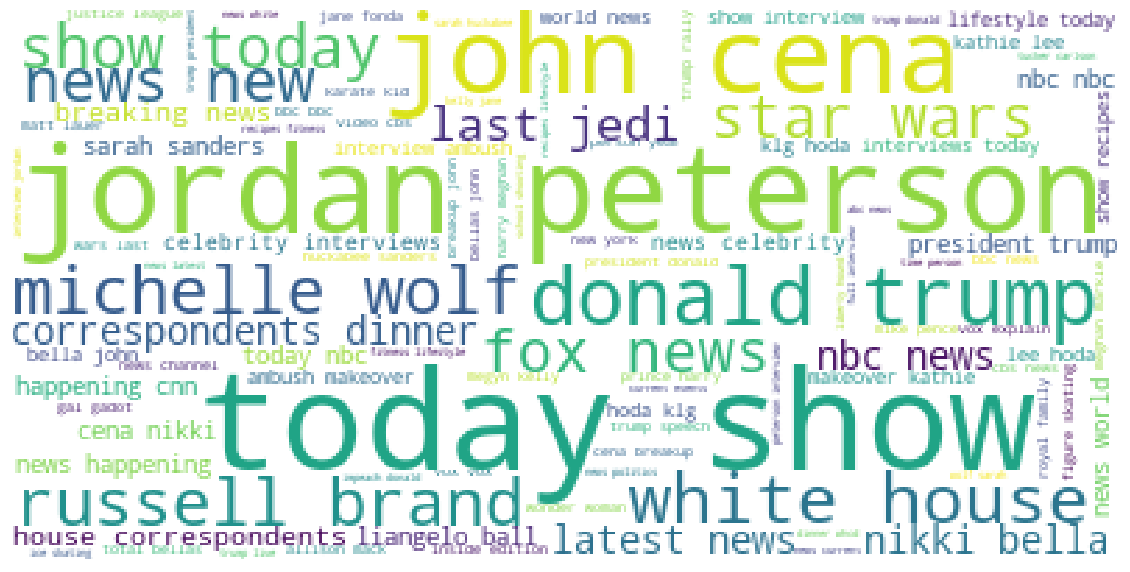

In [29]:
# News & Politics
tags_word = df[df['category_name'] == 'News & Politics']['tags'].str.lower().str.cat(sep = ' ')
tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
tags_word
word_tokens = word_tokenize(tags_word)
word_tokens
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
filtered_sentence
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
without_single_chr
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]
cleaned_data_title 
wcloud(cleaned_data_title, 'white')

In "News & Politics" videos, "jordan peterson"(a channel supported by a professor and clinical psychologist), "donald trumpmi", "michelle wolf"( a television host) and so on are hottest words.

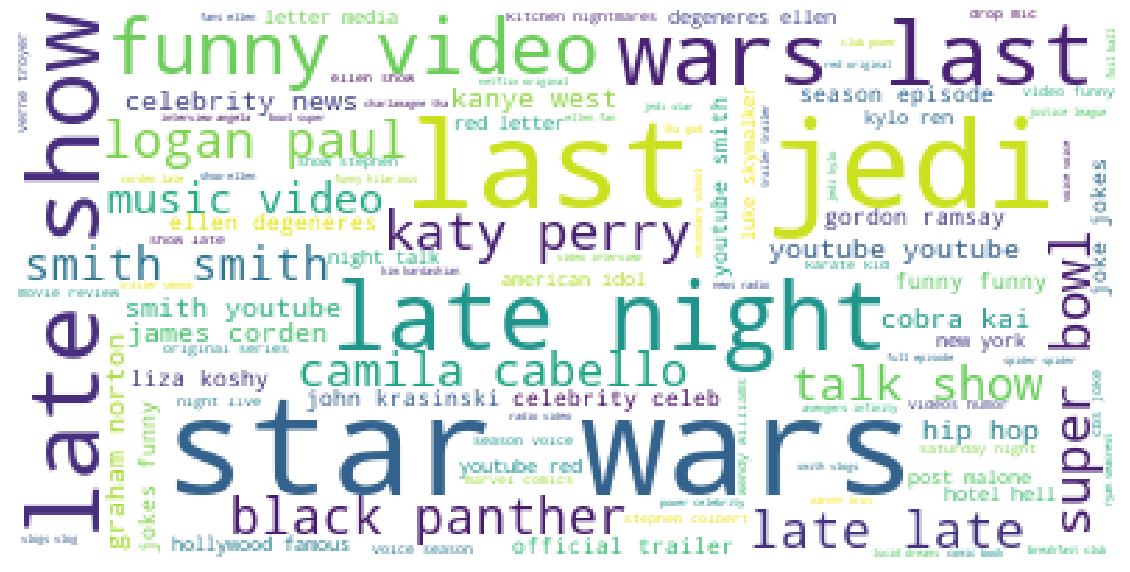

In [31]:
# Entertainment
tags_word = df[df['category_name'] == 'Entertainment']['tags'].str.lower().str.cat(sep = ' ')
tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]
wcloud(cleaned_data_title, 'white')

In "Entertainment" category, words like "star", "wars", "jedi" and so on appear quite frequently.

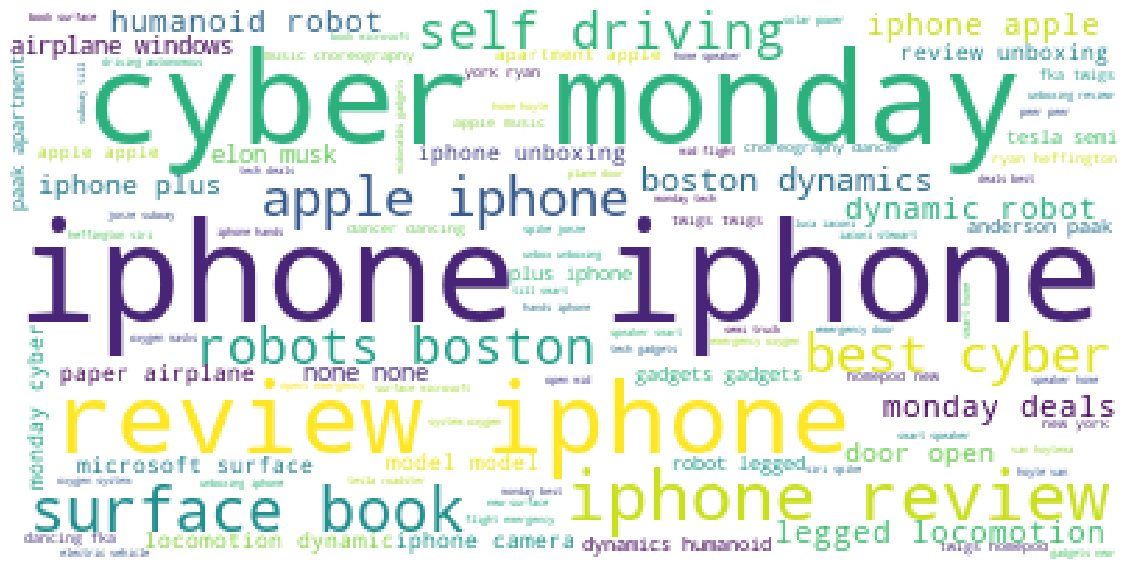

In [32]:
# Science & Technology
tags_word = df[df['category_name'] == 'Science & Technology']['tags'].str.lower().str.cat(sep = ' ')
tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]
wcloud(cleaned_data_title, 'white')

In "Science & Technology" category, words like "iphone", "cyber", "monday", "surface" and so on are the most common ones.

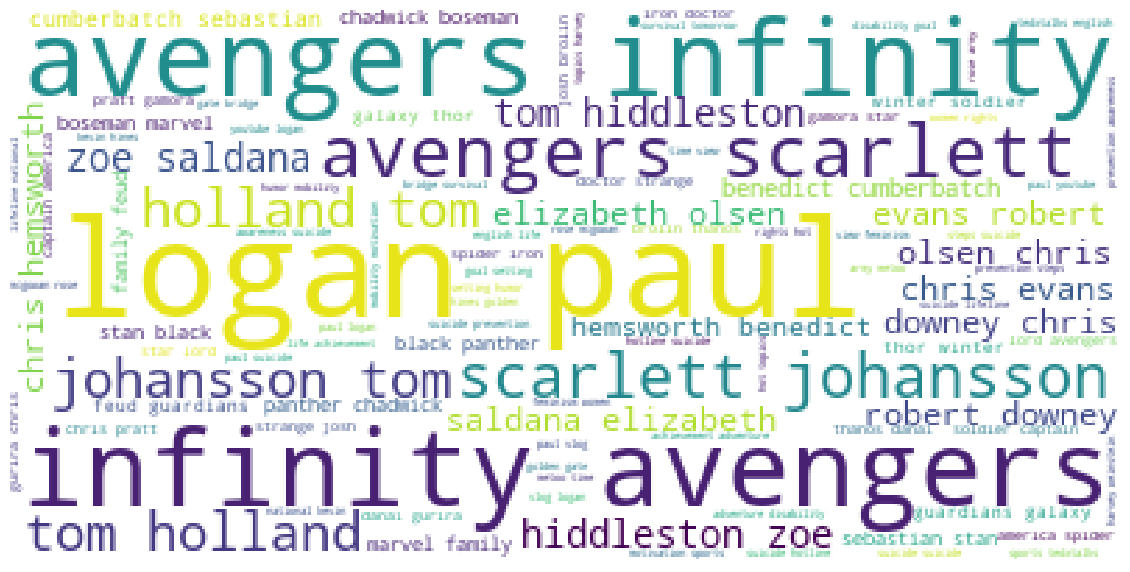

In [33]:
# Non Profits & Activism
tags_word = df[df['category_name'] == 'Non Profits & Activism']['tags'].str.lower().str.cat(sep = ' ')
tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]
wcloud(cleaned_data_title, 'white')

As for "Non Profits & Activism" category, "logan paul", "infinity avengersr" are the most common words.

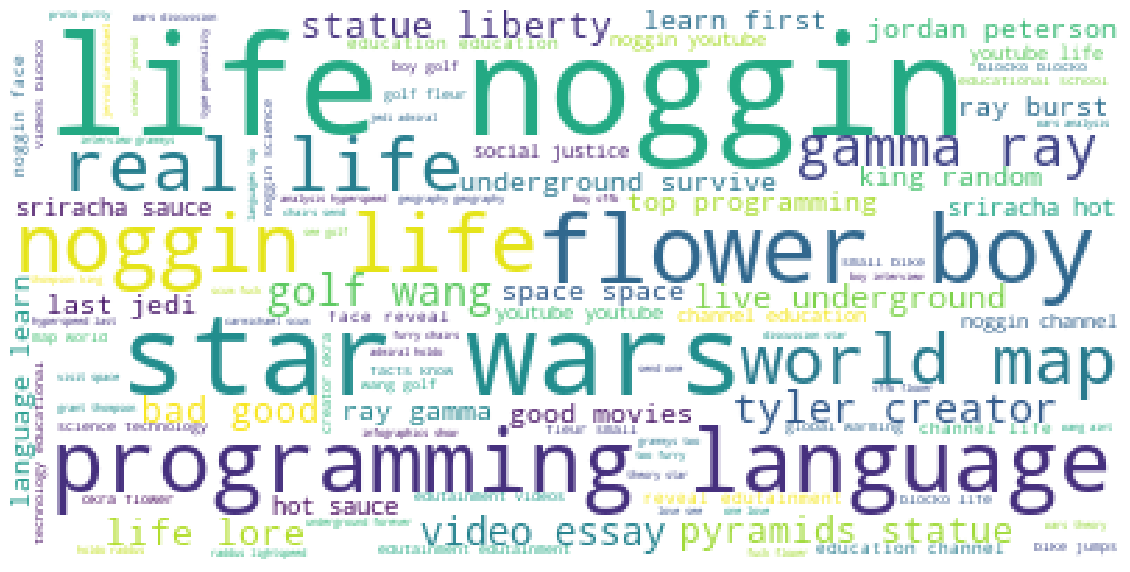

In [34]:
# Education
tags_word = df[df['category_name'] == 'Education']['tags'].str.lower().str.cat(sep = ' ')
tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]
wcloud(cleaned_data_title, 'white')

In "Education" category, words like "life", "noggin", "programming" and so on are the most common ones.

## 7. A summary of your findings 

In this research, overall features of UK's trending videos like quantity, publish time and especially the differnces of categories in respect of audience's interaction of these trending videos are explored. The topics people care about the most in some categories are also studied, which could give people an overview of what happened in that period of time.\
From these findings, there are maybe some suggestions for people who want to make a blockbuster success in the videos they make. In terms of choosing suitable categories, "Music" and "Entertainment" are great choices, since these two categories have most trending videos. They 'd better choose afternoon to publish their videos in order to obain more attention.\
Overall, this research is based on the YouTube trending videos, if there were more available data about YouTube videos (not just the YouTube trending videos), there would be more meaningful issues to study about, such as what kinds of factors are more related to the degree of "trending", the comparison of general YouTube videos and trending videos and so on.